In [2]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [3]:
# fetch dataset 
adult = fetch_ucirepo(id=2) 

# data (as pandas dataframes) 
X = adult.data.features 
y = adult.data.targets 

df = X.join(y)

# metadata 
print(adult.metadata) 
  
# variable information 
print(adult.variables) 

display(df)


{'uci_id': 2, 'name': 'Adult', 'repository_url': 'https://archive.ics.uci.edu/dataset/2/adult', 'data_url': 'https://archive.ics.uci.edu/static/public/2/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset. ', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Mon Aug 07 2023', 'dataset_doi': '10.24432/C5XW20', 'creators': ['Barry Becker', 'Ronny Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAG

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K.
48838,64,NaN,321403,HS-grad,9,Widowed,NaN,Other-relative,Black,Male,0,0,40,United-States,<=50K.
48839,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K.
48840,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K.


In [4]:
print(df.info())
print(df.shape)

print(df.columns[df.isnull().any()])

print(df.shape)

# drop rows with missing values
df = df.dropna()

print(df.shape)

# drop duplicates
df = df.drop_duplicates()

print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None
(48842, 15)
Index(['workclass', 'occupation', 'native-country'], dtype='object')
(48842,

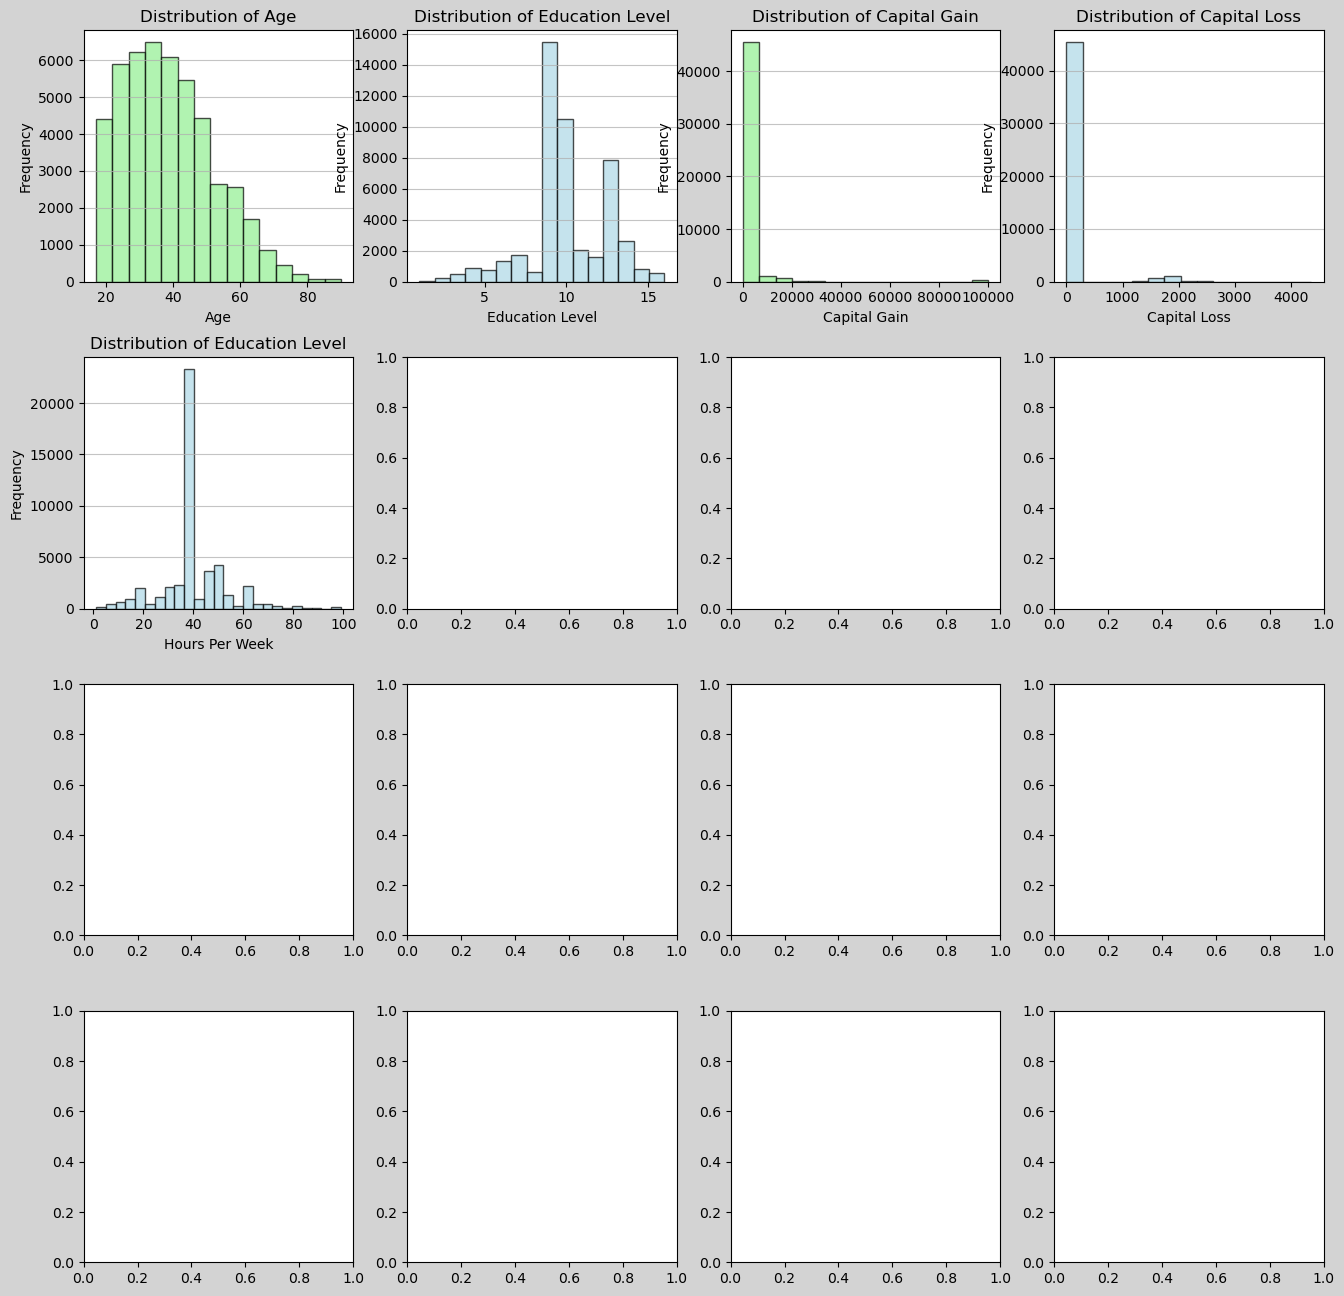

In [23]:
fig, axs = plt.subplots(4, 4, figsize = (16, 16))

axs[0,0].hist(df['age'], bins=15, color='lightgreen', edgecolor='black',alpha=0.7)
axs[0,0].set_title('Distribution of Age')
axs[0,0].set_xlabel('Age')
axs[0,0].set_ylabel('Frequency')
axs[0,0].grid(axis='y', alpha=0.75)

axs[0,1].hist(df['education-num'], bins=df['education-num'].nunique(), color='lightblue', edgecolor='black',alpha=0.7)
axs[0,1].set_title('Distribution of Education Level')
axs[0,1].set_xlabel('Education Level')
axs[0,1].set_ylabel('Frequency')
axs[0,1].grid(axis='y', alpha=0.75)

axs[0,2].hist(df['capital-gain'], bins=15, color='lightgreen', edgecolor='black',alpha=0.7)
axs[0,2].set_title('Distribution of Capital Gain')
axs[0,2].set_xlabel('Capital Gain')
axs[0,2].set_ylabel('Frequency')
axs[0,2].grid(axis='y', alpha=0.75)

axs[0,3].hist(df['capital-loss'], bins=15, color='lightblue', edgecolor='black',alpha=0.7)
axs[0,3].set_title('Distribution of Capital Loss')
axs[0,3].set_xlabel('Capital Loss')
axs[0,3].set_ylabel('Frequency')
axs[0,3].grid(axis='y', alpha=0.75)

axs[1,0].hist(df['hours-per-week'], bins=25, color='lightblue', edgecolor='black',alpha=0.7)
axs[1,0].set_title('Distribution of Education Level')
axs[1,0].set_xlabel('Hours Per Week')
axs[1,0].set_ylabel('Frequency')
axs[1,0].grid(axis='y', alpha=0.75)

fig.subplots_adjust(wspace=0.2, hspace=0.3)
fig.set_facecolor('lightgray')

plt.show()